# SVM Linear Model for Subtask C - 2019 OLID Dataset - Model Created by Team 5

In [ ]:
#C) Level C: Offense target identification

#(IND) Individual - The target of the offensive post is an individual: a famous person, a named individual or an unnamed person interacting in the conversation.
# (GRP) Group - The target of the offensive post is a group of people considered as a unity due to the same ethnicity, gender or sexual orientation, political affiliation, religious belief, or something else.
# (OTH) Other – The target of the offensive post does not belong to any of the previous two categories (e.g., an organization, a situation, an event, or an issue)


In [ ]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import demoji


In [ ]:
# We are loading the labels dataset for subtask c
labels_data = pd.read_csv("/content/labels-levelc.csv", sep='\t', header=None, names=['combined'])

labels_data['id'] = labels_data['combined'].str.split(',').str[0]
labels_data['label'] = labels_data['combined'].str.split(',').str[1]

labels_data = labels_data.drop(columns=['combined'])

##since the data frame is producing two data points in one column, we have to split the data and added it into both the columns instead of it disrputing the loading


In [ ]:
# We are loading the testset-levels dataset for subtask c
testset_data = pd.read_csv("/content/testset-levelc.tsv", sep='\t', header=0, names=['id', 'tweet'])


In [ ]:
# We are loading the olid training dataset for subtask c
olid_data = pd.read_csv("/content/olid-training-v1.0.tsv", sep='\t', header = 0,  names=['id', 'tweet', 'subtask_a', 'subtask_b','subtask_c'])


In [ ]:
olid_data ##printing a good number of rows just to clarify the table is alglined with all the proper data along with its features

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH
13238,27429,@USER Pussy,OFF,UNT,NaN


In [ ]:
# Producing all the datasets together to show how the data is aligned
print("Labels Data:")
print(labels_data.head())
print()
print("Testset Data:")
print(testset_data.head())
print()
print("\nOLID Data:")
print(olid_data.head())

Labels Data:
      id label
0  15923   OTH
1  60133   GRP
2  83681   IND
3  65507   OTH
4  34263   IND

Testset Data:
      id                                              tweet
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1  60133  #NoPasaran: Unity demo to oppose the far-right...
2  83681           . . . What the fuck did he do this time?
3  65507  @USER Do you get the feeling he is kissing @US...
4  34263  #StopKavanaugh he is liar like the rest of the...


OLID Data:
      id                                              tweet subtask_a  \
0  86426  @USER She should ask a few native Americans wh...       OFF   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2  16820  Amazon is investigating Chinese employees who ...       NOT   
3  62688  @USER Someone should'veTaken" this piece of sh...       OFF   
4  43605  @USER @USER Obama wanted liberals &amp; illega...       NOT   

  subtask_b subtask_c  
0       UNT       NaN  
1       TIN       IND 

In [ ]:
# This will fill in the empty or null values in the data frames, especially in the olid data and the test set data
olid_data['tweet'].fillna('', inplace=True)
testset_data['tweet'].fillna('', inplace=True)


#Preprocessing, removing punctuation, hastags, and stopwords

In [ ]:
# Preprocessing the text data
import string
import re

def preprocess_tweet(tweet):
    # This will remove hashtags, @USER mentions, and numbers
    tweet = re.sub(r'#\S+', '', tweet)
    tweet = re.sub(r'@USER', '', tweet)
    tweet = re.sub(r'\d', '', tweet)

    # This will remove the punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # This will remove emojis using demoji library
    tweet = demoji.replace(tweet, repl='')


    return tweet

In [ ]:
# Apply preprocessing to the tweet column in both olid_df and testset_df
olid_data['tweet'] = olid_data['tweet'].apply(preprocess_tweet)
testset_data['tweet'] = testset_data['tweet'].apply(preprocess_tweet)

In [ ]:
#Will print the data after the preprocessing
print("Testset Data:")
print(testset_data.head())
print()
print("\nOLID Data:")
print(olid_data.head())

Testset Data:
      id                                              tweet
0  15923      Democrats Support Antifa Muslim Brotherhoo...
1  60133   Unity demo to oppose the farright in  –   — E...
2  83681                  What the fuck did he do this time
3  65507   Do you get the feeling he is kissing  behind ...
4  34263               he is liar like the rest of the  URL


OLID Data:
      id                                              tweet subtask_a  \
0  86426   She should ask a few native Americans what th...       OFF   
1  90194                       Go home you’re drunk     URL       OFF   
2  16820  Amazon is investigating Chinese employees who ...       NOT   
3  62688   Someone shouldveTaken this piece of shit to a...       OFF   
4  43605    Obama wanted liberals amp illegals to move i...       NOT   

  subtask_b subtask_c  
0       UNT       NaN  
1       TIN       IND  
2       NaN       NaN  
3       UNT       NaN  
4       NaN       NaN  


In [ ]:
# This is TF-IDF vectorization, which is imported from the sklearn.feature_extraction text. This can vectorize the tweets from the olid data and testset_data
 #the stop words are 'english' and just a standard number of max_features of 5000
tfidf_vectorize = TfidfVectorizer(stop_words='english', max_features=5000)


In [ ]:
# Created the TF-IDF vectorization, which will represent train and test sets from the olid_data training set with annotations/tweets and also the testset data
tfidf_train_set = tfidf_vectorize.fit_transform(olid_data['tweet'])
tfidf_test_set = tfidf_vectorize.transform(testset_data['tweet'])

In [ ]:
# This will convert the TF-IDF vectorized matrices to the actual dataframe.
#It will convert to an array, then put the features to be eligible to convert completely into a dataframe.

tfidf_train_set_df = pd.DataFrame(tfidf_train_set.toarray(), columns=tfidf_vectorize.get_feature_names_out())
tfidf_test_set_df = pd.DataFrame(tfidf_test_set.toarray(), columns=tfidf_vectorize.get_feature_names_out())


In [ ]:
# It will take the "id" column from each dataframe and find the strings and merge the dataframe based on the id.
# This means each of the dataframs have these common ids, that is how it merges.

testset_data['id'] = testset_data['id'].astype(str)
labels_data['id'] = labels_data['id'].astype(str)


test_labels_data = pd.merge(testset_data, labels_data, on='id', how='inner')


In [ ]:
# Printing out the table to see how the output is.
test_labels_data

,id,tweet,label
0,15923,Democrats Support Antifa Muslim Brotherhoo...,OTH
1,60133,Unity demo to oppose the farright in – — E...,GRP
2,83681,What the fuck did he do this time,IND
3,65507,Do you get the feeling he is kissing behind ...,OTH
4,34263,he is liar like the rest of the URL,IND
...,...,...,...
208,30778,Fuck you all Que florezcan mil Baby Etchecopar,IND
209,22569,are mentally unstable cowards pretending to b...,GRP
210,48938,And Browning looked like dog shit against th...,IND
211,41438,All two of them taste like ass URL,GRP


In [ ]:
# Counting the number of labels
test_labels_data["label"].value_counts()

IND    100
GRP     78
OTH     35
Name: label, dtype: int64

In [ ]:
# This will drop the rows that have values of NaN in the target column
train_data = pd.concat([tfidf_train_set_df, olid_data['subtask_c']], axis=1).dropna(subset=['subtask_c'])

# All the training, testing of X's and y's will split the data for the Support Vector Machine model
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('subtask_c', axis=1), train_data['subtask_c'], test_size=0.2, random_state=42)


In [ ]:
# This is training the SVM model by fitting in the X and y training sets.
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# This will create or make predictions based on the validation set
validation_predictions = svm_model.predict(X_val)

In [ ]:
#prints the target column with the adjustments
print(validation_predictions[:10])

['GRP' 'IND' 'GRP' 'IND' 'IND' 'GRP' 'IND' 'IND' 'GRP' 'IND']


In [ ]:
# Will evaluate the model
accuracy = accuracy_score(y_val, validation_predictions)
print("Accuracy: {:.3f}%".format(accuracy * 100))


Accuracy: 69.974%


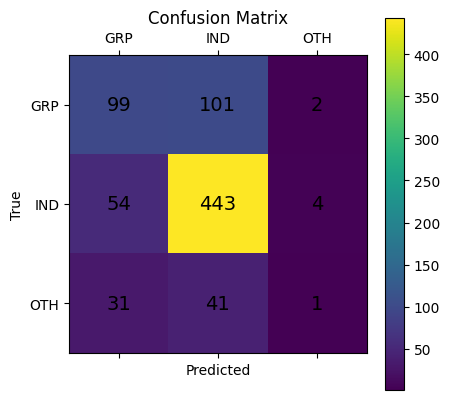

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# This is the calculation for the confusion matrix
cm = confusion_matrix(y_val, validation_predictions)

# plotting the matrix
plt.matshow(cm)
plt.colorbar()

# Printing the exact number onto the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(3), ['GRP', 'IND', 'OTH'])
plt.yticks(range(3), ['GRP', 'IND', 'OTH'])
plt.title('Confusion Matrix')
plt.savefig('confusionMatrix_OLID.png')
plt.show()


In [ ]:
# This is a sample prediction, where it will print the first 15 true and predicted labels
for i in range(15):
  print("True:", y_val.iloc[i], "Predicted:", validation_predictions[i])

True: IND Predicted: GRP
True: IND Predicted: IND
True: IND Predicted: GRP
True: GRP Predicted: IND
True: IND Predicted: IND
True: IND Predicted: GRP
True: IND Predicted: IND
True: GRP Predicted: IND
True: GRP Predicted: GRP
True: GRP Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: OTH Predicted: IND


In [ ]:
#Classification report

classification = classification_report(y_val, validation_predictions)
print("Classification Report:\n", classification)

Classification Report:
               precision    recall  f1-score   support

         GRP       0.54      0.49      0.51       202
         IND       0.76      0.88      0.82       501
         OTH       0.14      0.01      0.03        73

    accuracy                           0.70       776
   macro avg       0.48      0.46      0.45       776
weighted avg       0.64      0.70      0.66       776



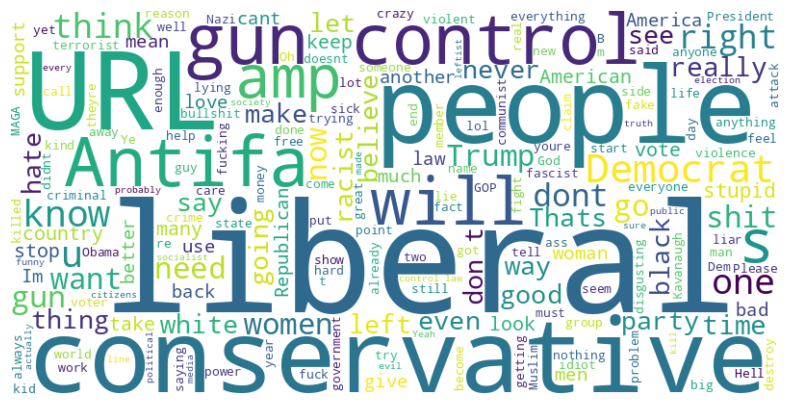

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(olid_data[olid_data['subtask_c'] == 'GRP']['tweet'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('WordCloudGRP_OLID.png')
plt.show()

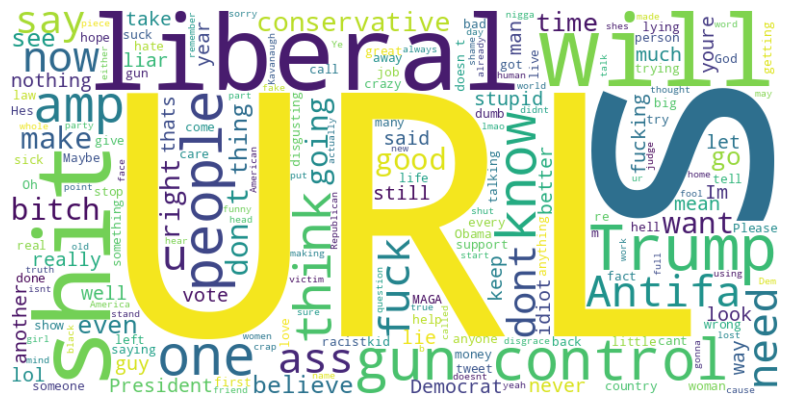

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(olid_data[olid_data['subtask_c'] == 'IND']['tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('WordCloudIND_OLID.png')
plt.show()

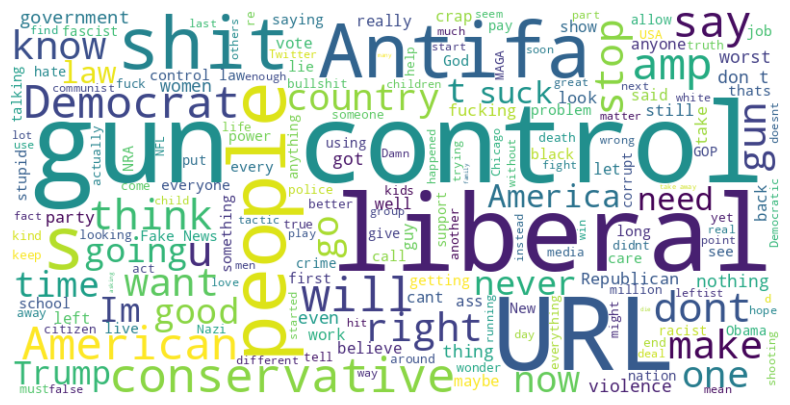

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wordcloud = ' '.join(olid_data[olid_data['subtask_c'] == 'OTH']['tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('WordCloudOTH_OLID.png')
plt.show()

## SOLID 2020 - SVM Linear Model - Quick model detection accuracy

In [ ]:
import pandas as pd

column = ["id", "label"]
labels_data = pd.read_csv("/content/test_c_labels_all.csv", sep=',', header=None, names=column)

tweets_data = pd.read_csv("/content/test_c_tweets_all.tsv", sep='\t', header=0, names=['id', 'tweet'])

In [ ]:
# Producing all the datasets together to show how the data is aligned
print("Labels Data:")
print(labels_data.head())
print()
print("Test set Dat")
print(tweets_data.head())

Labels Data:
     id label
0   B51   IND
1   B94   IND
2   B99   IND
3  B184   IND
4  B239   IND

Test set Dat
     id                                              tweet
0   B51  #ThingsFriendsWontTellYou You sagging your pan...
1   B94  @USER What have you done...Distorting our hind...
2   B99  @USER do the two of you sit at home and practi...
3  B184  Somebody come get her she's dancing like a str...
4  B239  @USER Ag,u a not going to say anything just li...


In [ ]:
test_data = pd.merge(tweets_data, labels_data, on='id')
test_data

,id,tweet,label
0,B51,#ThingsFriendsWontTellYou You sagging your pan...,IND
1,B94,@USER What have you done...Distorting our hind...,IND
2,B99,@USER do the two of you sit at home and practi...,IND
3,B184,Somebody come get her she's dancing like a str...,IND
4,B239,"@USER Ag,u a not going to say anything just li...",IND
...,...,...,...
1541,BC2096,@USER This is an outright lie and I am about t...,IND
1542,BC2097,"Okay im over it , fuck niggas and all that...",GRP
1543,BC2100,@USER What do you mean “IF” we already know he...,IND
1544,BC2101,@USER @USER Nothing about trump is human or no...,IND


In [ ]:
# Apply preprocessing to the tweet column in the new test data
test_data['tweet'] = test_data['tweet'].apply(preprocess_tweet)

test_data

,id,tweet,label
0,B51,You sagging your pants with a ntswape,IND
1,B94,What have you doneDistorting our hindu script...,IND
2,B99,do the two of you sit at home and practice yo...,IND
3,B184,Somebody come get her shes dancing like a stri...,IND
4,B239,Agu a not going to say anything just like Zum...,IND
...,...,...,...
1541,BC2096,This is an outright lie and I am about to exp...,IND
1542,BC2097,Okay im over it fuck niggas and all that,GRP
1543,BC2100,What do you mean “IF” we already know he’s be...,IND
1544,BC2101,Nothing about trump is human or normal Unles...,IND


In [ ]:
# Transform the new test tweets using the TF-IDF vectorizer
tfidf_test = tfidf_vectorize.transform(tweets_data['tweet'])

# Convert the TF-IDF vectorized matrix to a DataFrame
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorize.get_feature_names_out())


In [ ]:
tfidf_test_set = tfidf_vectorize.transform(test_data['tweet'])
tfidf_test_set_df = pd.DataFrame(tfidf_test_set.toarray(), columns=tfidf_vectorize.get_feature_names_out())

In [ ]:
# Combine datasets based on 'id'
solid_data = pd.merge(tweets_data, labels_data, on='id')

# Apply preprocessing to the 'tweet' column in the combined dataset
solid_data['tweet'] = solid_data['tweet'].apply(preprocess_tweet)

# Transform the tweets using the TF-IDF vectorizer
tfidf_combined = tfidf_vectorize.transform(solid_data['tweet'])

# Convert the TF-IDF vectorized matrix to a DataFrame
tfidf_combined_df = pd.DataFrame(tfidf_combined.toarray(), columns=tfidf_vectorize.get_feature_names_out())

# Separate features (X) and target (y) in the combined dataset
X_train = tfidf_combined_df
y_test = solid_data['label']

# Train the SVM model on the combined data
svm_model.fit(X_train, y_test)


SVC(kernel='linear')

In [ ]:

solid_predictions = svm_model.predict(X_train)


accuracy = accuracy_score(y_test, solid_predictions)
print("Accuracy on SOLID 2020 Data: {:.3f}%".format(accuracy * 100))


classification_report = classification_report(y_test, solid_predictions)
print("Classification Report on SOLID 2020 Data:\n", classification_report)


Accuracy on SOLID 2020 Data: 84.282%
Classification Report on SOLID 2020 Data:
               precision    recall  f1-score   support

         GRP       0.92      0.62      0.74       349
         IND       0.83      0.99      0.90      1057
         OTH       0.97      0.26      0.42       140

    accuracy                           0.84      1546
   macro avg       0.90      0.63      0.69      1546
weighted avg       0.86      0.84      0.82      1546



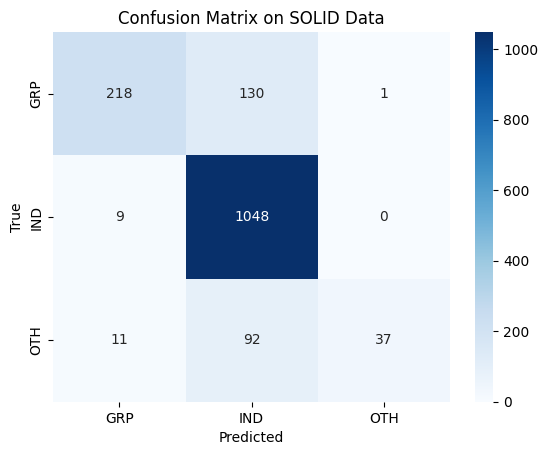

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_combined = confusion_matrix(y_test, solid_predictions)

sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=['GRP', 'IND', 'OTH'], yticklabels=['GRP', 'IND', 'OTH'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on SOLID Data')
plt.savefig('ConfusionMatrix_SOLID_C.png')
plt.show()

In [ ]:
# This is a sample prediction, where it will print the first 15 true and predicted labels
for i in range(15):
  print("True:", y_test.iloc[i], "Predicted:", solid_predictions[i])

True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: IND Predicted: IND
True: GRP Predicted: GRP
True: IND Predicted: IND
True: IND Predicted: IND
True: GRP Predicted: GRP
True: OTH Predicted: OTH
True: IND Predicted: IND
True: IND Predicted: IND


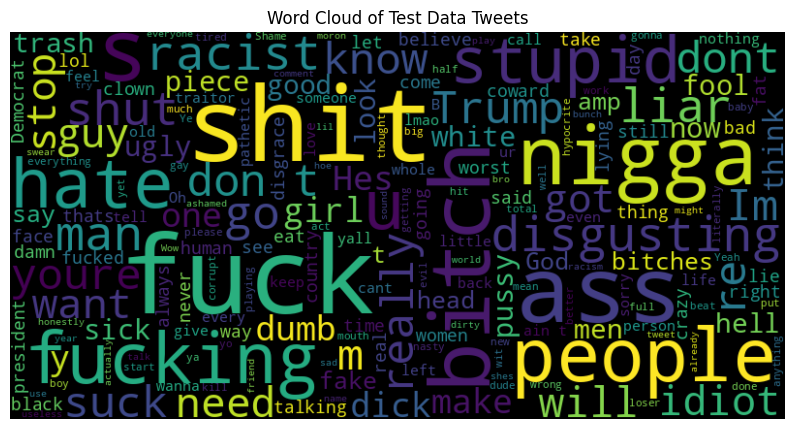

In [ ]:
all_tweets = ' '.join(test_data['tweet'])

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_tweets)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Test Data Tweets')
plt.savefig('WordCloud_SOLID_C.png')
plt.show()
